In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE, MDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn import grid_search
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [14]:
pv = pd.read_csv("protVec_100d_3grams.csv.gz", sep="\\t", header=None)
protvec = {}
for row in pv.iterrows():
    row = list(list(row)[1])
    row[-1] = float(row[-1][:-1])
    protvec[row[0][1:]] = np.array(row[1:], dtype=float)

def compute_vec(seq, protvec = protvec):
    res = np.array([0] * 100, dtype=float)
    for i in range(len(seq) - 2):
        res += protvec[seq[i:i+3]]
    return res

db_orig = pd.read_csv("../vdjdb-db/database/vdjdb.slim.txt", sep="\t")
v1 = db_orig.groupby(["gene", "species", "antigen.species"]).get_group(("TRB", "HomoSapiens", "CMV"))
v2 = db_orig.groupby(["gene", "species", "antigen.species"]).get_group(("TRB", "HomoSapiens", "EBV"))
v3 = db_orig.groupby(["gene", "species", "antigen.species"]).get_group(("TRB", "HomoSapiens", "HIV-1"))
v4 = db_orig.groupby(["gene", "species", "antigen.species"]).get_group(("TRB", "HomoSapiens", "HCV"))

v5 = db_orig.groupby(["gene", "species", "antigen.species"]).get_group(("TRB", "MacacaMulatta", "HIV-1"))
v5["antigen.species"] = "HIV-1-mm"
v6 = db_orig.groupby(["gene", "species", "antigen.species"]).get_group(("TRB", "MacacaMulatta", "SIV"))
db = pd.concat([v1, v2, v3, v4, v5, v6])
db_vec = np.array(list(map(compute_vec, db["cdr3"])))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


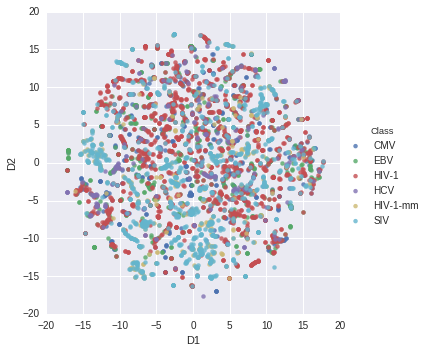

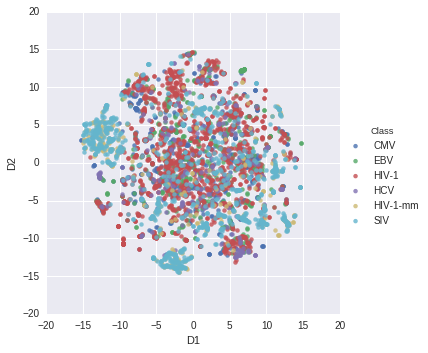

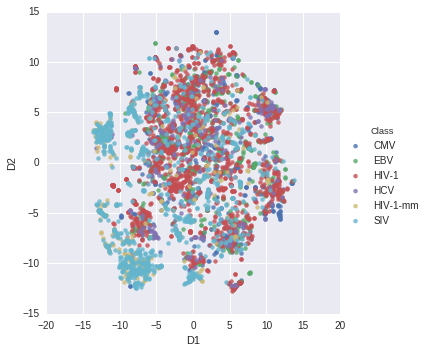

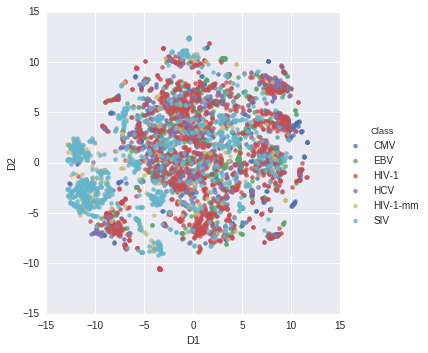

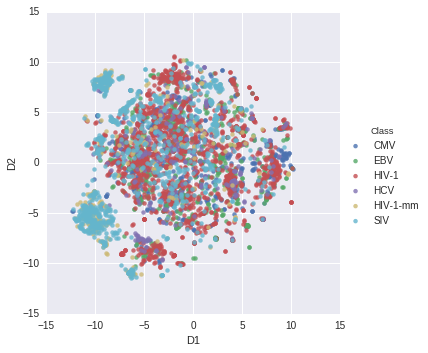

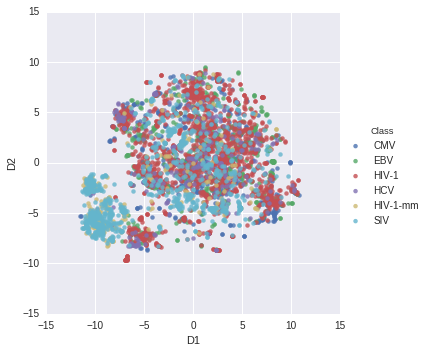

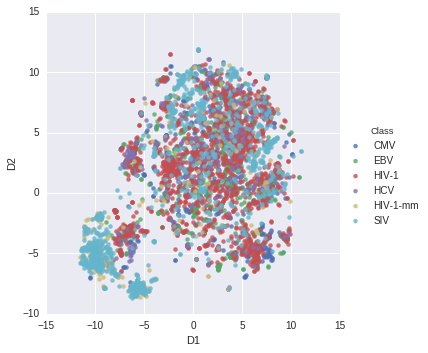

In [17]:
#f, ax = plt.subplots(3, )

def compute_tsne(perp, i, j):
    tsne = TSNE(perplexity=perp)
    vec_tsne = tsne.fit_transform(db_vec)
    df_tsne = pd.DataFrame({"D1": vec_tsne[:,0], "D2": vec_tsne[:,1], "Class": db["antigen.species"]})
    return sns.lmplot("D1", "D2", data = df_tsne, hue = "Class", fit_reg = False)

compute_tsne(5, 0, 0)
compute_tsne(15, 0, 0)
compute_tsne(30, 0, 0)
compute_tsne(50, 0, 0)
compute_tsne(70, 0, 1)
compute_tsne(90, 1, 0)
compute_tsne(115, 1, 1)

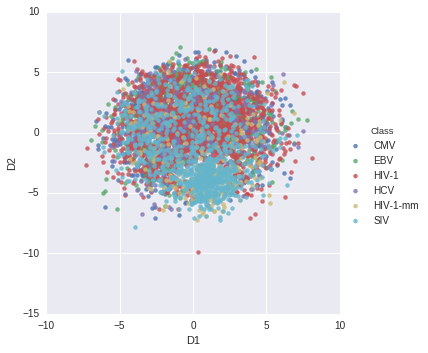

In [16]:
db_vec = np.array(list(map(compute_vec, db["cdr3"])))
tsne = MDS(n_jobs = 4)
vec_tsne = tsne.fit_transform(db_vec)
df_tsne = pd.DataFrame({"D1": vec_tsne[:,0], "D2": vec_tsne[:,1], "Class": db["antigen.species"]})
sns.lmplot("D1", "D2", data = df_tsne, hue = "Class", fit_reg = False)